In [1]:
from IPython.display import display, HTML

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mlp
import matplotlib.pyplot as plt
import geopandas as gp

import os

os.chdir("../../../core")
import GT_helper_functions as hf
import GT_load_data as data

base_dir = "../../Outcome Measurement Data/"

In [2]:
%matplotlib inline
plt.style.use('ggplot')
sb.set_style("whitegrid")
plt.rcParams["ytick.labelsize"] = 13
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 15
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["grid.linewidth"] = 2.0
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.1
plt.rcParams["legend.frameon"] = True
plt.rcParams["legend.framealpha"]= 0.9
plt.rcParams["legend.edgecolor"] = "black"
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["figure.titlesize"] = 18
plt.rcParams["figure.dpi"] = 150
plt.rcParams["figure.autolayout"] = False
pd.options.display.max_columns = 100
pd.options.display.max_seq_items = 200

In [3]:
priordepts2014 = [1, 5, 12, 10, 9, 11, 18, 19 ]
priordepts2018 = [10, 11, 12, 14, 9, 13, 16, 18, 1, 5, 17]
labs2018 = [17, 16,18,19,1,13,12,9,11,10,5]
labs2016 = [1, 9, 12, 10, 18, 5, 11]

In [4]:
tbquimio = pd.read_csv(base_dir + "TUBERCULOSIS/Notificaciones TB/GTM - TB quimio 2012-Jun2018.csv", 
                     encoding="latin-1", index_col = 0, low_memory = False)

In [5]:
#tbquimio[tbquimio.FECHAINICIOTX!="ND"].YearMonth.value_counts().sort_index()

In [6]:
tbquimio["lte5yo"] = tbquimio.EDAD <= 5
tbquimio["_sem"] = tbquimio.YEAR.astype(str)+(tbquimio.YearMonth%100<7).map(lambda x: " - 1st Sem" if x else " - 2nd Sem")
ts = tbquimio.groupby(["_sem", 
                       "lte5yo"]).apply(len).unstack()
ts = ts[ts.index != "2018 - 2nd Sem"]

In [7]:
ts.columns = ["> 5 years old", "≤ 5 years old"]

0

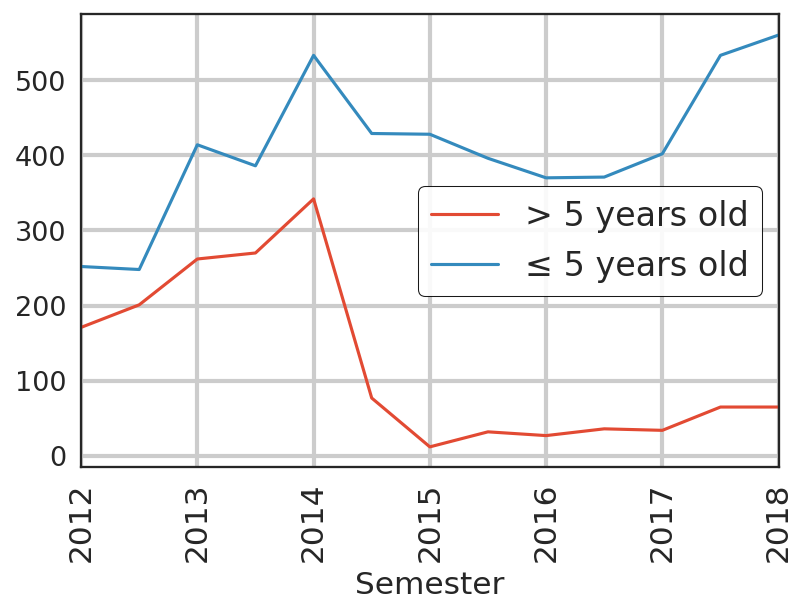

In [8]:
ts.plot()
plt.xlabel("Semester")
plt.xticks([0,2, 4, 6, 8, 10,12], [2012, 2013,2014,2015,2016,2017,2018], rotation=90)
0

Text(0.5, 0, 'Year')

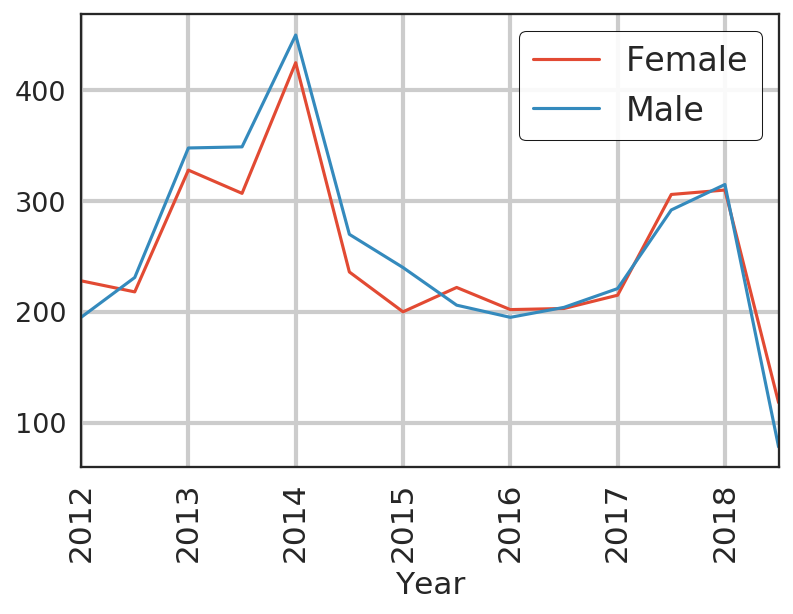

In [9]:
mlp.rcParams['figure.figsize'] = [6, 4]

ts = tbquimio.groupby(["_sem", "SEXO"]).apply(len).unstack()
ts.columns = ["Female", "Male"]
ax = ts.plot()
ax.set_xticks([0,2, 4, 6, 8, 10,12])
ax.set_xticklabels([2012, 2013,2014,2015,2016,2017,2018], rotation=90)
ax.set_xlabel("Year")

0

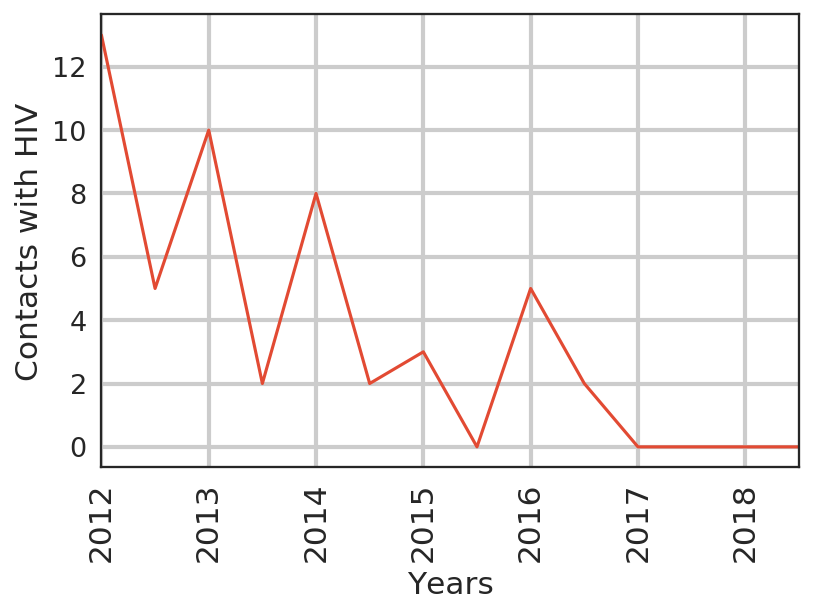

In [10]:
ts = tbquimio[tbquimio.VIH=="Reactive"].groupby(["_sem"]).apply(len)
ts.reindex(tbquimio._sem.unique(), fill_value=0).plot()
plt.xlabel("Years")
plt.ylabel("Contacts with HIV")
plt.xticks([0,2, 4, 6, 8, 10,12], [2012, 2013,2014,2015,2016,2017,2018], rotation=90)
0

In [11]:
tbnots = pd.read_csv(base_dir + "TUBERCULOSIS/Notificaciones TB/GTM - TB notifications 2012-Jun2018.csv", 
                     encoding="latin-1", index_col = 0, low_memory = False)

0

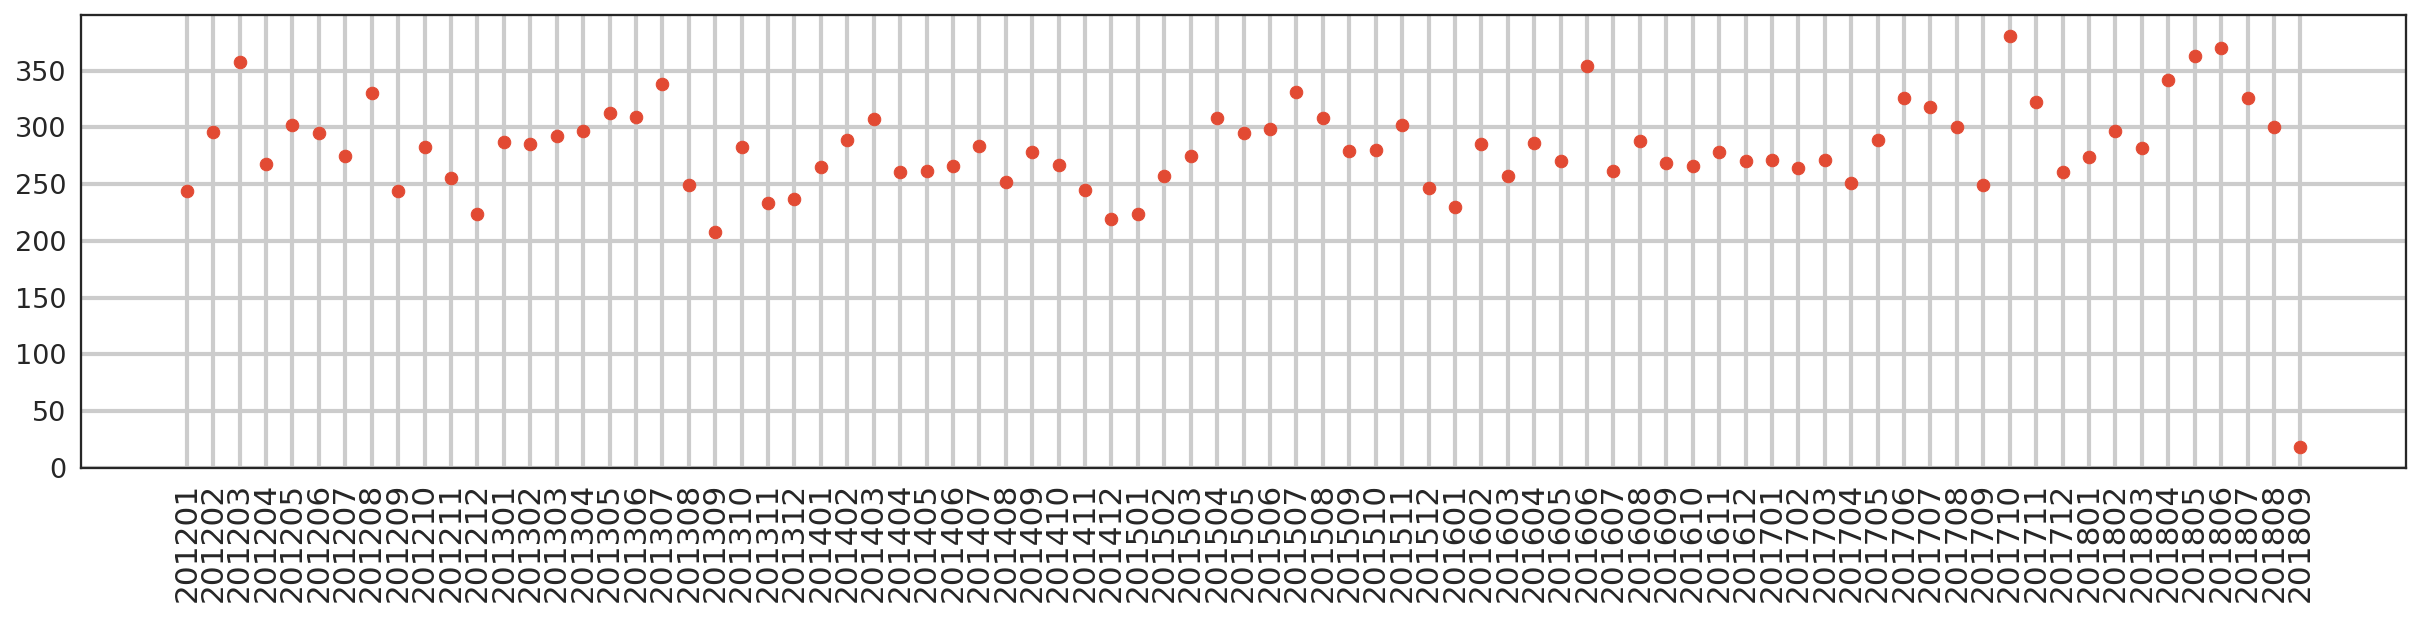

In [21]:
mlp.rcParams['figure.figsize'] = [20, 4]
temp = tbnots.assign(ym = lambda x: x.YearMonth.astype(str)).groupby("ym").apply(len).sort_index()
plt.scatter(temp.index, temp.values)
plt.xticks(rotation=90)
0

In [21]:
tbnots.groupby(["SEXO", "YEAR"]).SEXO.count().unstack(0).apply(lambda x: 
       pd.Series([round(y*100,1) for y in hf.bernoulliBayesian(x.f, x.m)], ["p", "c1", "c2"]) , 1)

,p,c1,c2
YEAR,,,
2012,44.9,43.2,46.6
2013,44.2,42.5,45.9
2014,42.4,40.7,44.1
2015,42.7,41.0,44.3
2016,41.8,40.1,43.5
2017,42.7,41.0,44.3
2018,42.7,40.8,44.6


In [16]:
tbnots.columns

Index(['X', 'NOMBRES', 'DIRECCION', 'MUNICIPIO', 'DEPARTAMENTO',
       'SERVICIODESALUD', 'SEXO', 'EDAD', 'RANGOEDAD', 'PESOLBS', 'PESOKG',
       'CONDICIONINGRESO', 'FECHANOTIFICACION', 'FECHAINICIOTX',
       'CLASIFICACION', 'VIH', 'ESQUEMA', 'CONTACTOS', 'OTRASPATOLOGIAS',
       'YEAR', 'YearMonth', 'TIPODETBPEDIATRICOS', 'FECHAPRUEBAVIH',
       'CONDICIONEGRESO', 'FECHAMUERTE', 'CAUSADEMUERTE',
       'PACIENTEPRIVADOLIBERTAD', 'DEPORTADO', 'LOCALIZACIONTB', 'METODODX',
       'CONTACTO_000_014', 'CONTACTO_MAYORA_015', 'CASOINDICE',
       'DESARROLLOTBCLASIFICACION', 'EMPLEADOMSPAS', 'UNIDADDX', 'FALLECIDOS',
       'CORRELATIVO', 'DAS', 'FECHANACIMIENTO', 'FECHAACTUAL', 'EDADDECADA',
       'EDUCACION', 'PUEBLO', 'OCUPACION', 'NUEVACONDICIONINGRESO', 'FECHADX',
       'NUEVOMETODODX', 'PDS', 'CONTACTO_000.0004', 'CONTACTO_MAYORA_005',
       'QUIMIO_VIH', 'DISTRITO', 'MIGRACION', 'CONDICIONPX', 'CAUSAMUERTE',
       'TipoTB', 'MESNOTIFICACION', 'OTRASPATOLOGIAS_2', 'OTRASPAT

In [7]:
tbnots.COD_DEPT.value_counts(dropna=False)

1     4292
5     3881
10    3507
12    2375
9     1374
11    1210
18     879
16     850
14     703
17     548
7      478
19     351
6      347
8      340
20     327
22     314
3      283
15     192
4      167
2      145
21     132
Name: COD_DEPT, dtype: int64

In [9]:
tbnots.groupby(["YEAR", "COD_DEPT"]).apply(len).to_csv("../../Outcome Measurement Data/TUBERCULOSIS/TB_Notifs_Year_Depto.csv")

1 1079 690 [-1.7214706840698337, -1.563768115942029, -1.4219593202998835]
2 48 25 [-3.1873807773762173, -1.92, -1.201207485009095]
3 48 59 [0.8412266425580828, 1.2291666666666667, 1.8097709484488442]
4 38 27 [-2.3402274944800445, -1.4074074074074074, -0.8645476177232982]
5 1024 618 [-1.8321381478861003, -1.656957928802589, -1.5004019436205014]
6 81 68 [-1.6501561869241348, -1.1911764705882353, -0.863845931607158]
7 94 87 [-1.4487939027686068, -1.0804597701149425, -0.8071204542748386]
8 84 61 [-1.9259276451781533, -1.3770491803278688, -0.9933014903540861]
9 263 203 [-1.5579744756923728, -1.2955665024630543, -1.0797208004704253]
10 791 683 [-1.2832730166158526, -1.158125915080527, -1.0455905722241303]
11 306 245 [-1.4789399698270294, -1.2489795918367348, -1.0564511958023397]
12 532 427 [-1.4158555197608877, -1.2459016393442623, -1.0973365696792245]
14 159 131 [-1.5322685537010057, -1.213740458015267, -0.963956477317256]
15 41 28 [-2.4044281343634197, -1.4642857142857142, -0.9119209026789

Department     240.000000
Female        3964.000000
Male          5393.000000
Difference     -21.663464
CI_1           -31.146761
CI_2           -14.232954
dtype: float64

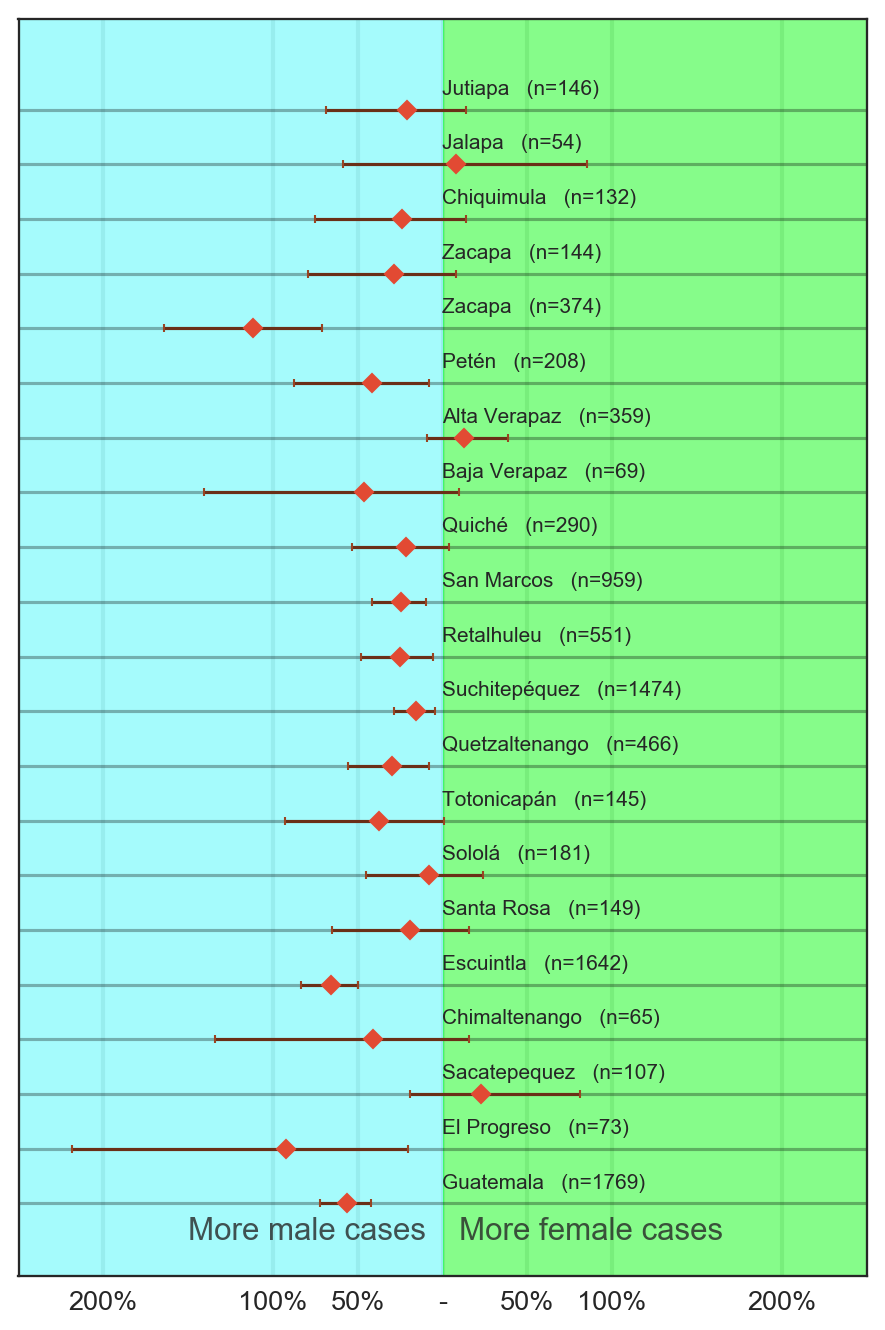

In [52]:
mlp.rcParams['figure.figsize'] = [6, 9]
d2 = tbnots[(tbnots.YEAR.isin([2016,2017,2018]))
          ].groupby(["SEXO", "COD_DEPT"]).apply(len)\
    .rename("Cases").unstack(0).fillna(0)

diffs = []
j = 0
for i, x in d2.iterrows():
    output = sorted([y*-1 for y in hf.ratioBayesian(x.m,x.f, 0.05)] if x.m>x.f else hf.ratioBayesian(x.f,x.m,0.05))
    print(i, x.m, x.f, output)
    if True and not np.isnan(output[1]):
        diffs.append([i, #[0], i[1], 
                      x.f, x.m, output[1], output[0], output[2]])
        lim1 = (abs(output[1]-output[0]) if abs(output[0])>1 else abs(1/output[0])-2+abs(output[1]) )
        lim2 = (abs(output[2]-output[1]) if abs(output[2])>1 else abs(1/output[2])-2+abs(output[1]) )
        plt.axhline(j, c = "#000000", alpha=0.3)
        plt.errorbar(output[1]+(1 if output[0]<0 else -1), j,
                     xerr = [[lim1],[lim2]], fmt="D", ecolor="#994422", capsize=2)
        plt.text(0, #0.2+max(output[0]+(1 if output[0]<0 else -1), -3), 
                 j+0.3, 
                 hf.code2depto[i] + "   (n=" + str(x.m+x.f) + ")", #[0], + "\n" + code2depto[i[1]], #rotation=90, 
                 verticalalignment='bottom', fontsize=10)
        j+=1.5
diffsdf = pd.DataFrame(diffs, columns= ["Department", 
                                        "Female", "Male", "Difference", "CI_1", "CI_2"])
plt.fill_between([-4.2,-0.0], [-2]*2, [len(diffsdf)*1.5+1]*2, color="#52fcff", alpha = 0.5)
plt.fill_between([0.0,4.2], [-2]*2, [len(diffsdf)*1.5+1]*2, color="#14ff1c", alpha = 0.5)
plt.text(-0.1, -1, "More male cases", fontsize=15, alpha=0.8, horizontalalignment="right")
plt.text(0.1, -1, "More female cases", fontsize=15, alpha=0.8, horizontalalignment="left")
plt.yticks([])
plt.grid(True, "both", color="#dedede")
plt.rcParams['axes.facecolor'] = '#fafafa'
plt.ylim(-2, len(diffsdf)*1.5+1)
#plt.axvline(-2.95, alpha=0.5, label="> 3 times more men")
plt.tight_layout(rect=(0,0,1,1))
# plt.legend()
plt.xticks([-2,-1,-0.5,0,0.5,1,2], ["200%", "100%", "50%", "-", "50%", "100%", "200%"], fontsize=13)
plt.xlim(-2.5, 2.5)
diffsdf.sum()
#plt.errorbar(diffsdf.Age, diffsdf.Difference, yerr = diffsdf[["CI_1", "CI_2"]].T.values)
#diffsdf[["CI_1", "CI_2"]].T.shape

In [51]:
hf.code2depto = {
    5: "Escuintla",
    16:"Alta Verapaz",
    18: "Izabal",
    10: "Suchitepéquez",
    6: "Santa Rosa",
    11: "Retalhuleu",
    17: "Petén",
    13: "Huehuetenango",
    14: "Quiché",
    15: "Baja Verapaz",
    7: "Sololá",
    8: "Totonicapán",
    18: "Zacapa",
    12: "San Marcos",
    4: "Chimaltenango",
    1: "Guatemala",
    22: "Jutiapa",
    20: "Chiquimula",
    2: "El Progreso",
    9: "Quetzaltenango",
    3: "Sacatepequez",
    21: "Jalapa",
    19: "Zacapa"
}